In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pathlib
import json
import logistic
from analysis_utils import ExprMgr
import shutil

In [2]:
style={ 0:'--', 1: '-', 3:':', 4:'dashdot',  2:'-', -1:'-', 5:'-'}
color={ 0:'C2', 1: 'C3', 3: 'C0', 4:'C1', -1:'C4', 2:'C5', 5:'purple'}
name={-1:'Naïve FᴇᴅAᴄ', 0:'FᴇᴅAᴠɢ', 1:'FᴇᴅAᴄ', 2:'FᴇᴅAᴄ-II', 3:'Mʙ-Sɢᴅ', 4: 'Mʙ-Aᴄ-Sɢᴅ', 5:'Linear'}
marker={ 0: '.', 1: '*', 2: 'p', 3:'^', 4: 'P', -1: 'x', 5:'o'}
fig_path = pathlib.Path('./fig')
ylabel = 'Best Suboptimality'

In [23]:
dataset, lambd, optimum = "a9a", 1.0, 0.593
expr_mgr = ExprMgr(dataset, lambd)
df = expr_mgr.get_data_frame(reload=True)

K_lst = df.K.unique() 
M_lst = df.M.unique() 
alg_lst = [
    5,0,1,
    3,4,
]

print(alg_lst)
print(K_lst)
print(M_lst)

[5, 0, 1, 3, 4]
[64 512 2048 1024 256 128 4096 32 8 2 1 4]
[8 256 2048 1]


In [10]:
dataset, lambd, optimum = "a9a", 0.1, 0.469 #848
expr_mgr = ExprMgr(dataset, lambd)
df = expr_mgr.get_data_frame(reload=True)

K_lst = df.K.unique() 
M_lst = df.M.unique() 
alg_lst = [
    5,0,1,
    3,4,
]

print(alg_lst)
print(K_lst)
print(M_lst)

[5, 0, 1, 3, 4]
[1024 512 256 128 2048 64]
[256 2048 1 8]


In [8]:
df.sort_values('best_loss', 0).head()

/Users/artin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only
  """Entry point for launching an IPython kernel.


,dataset,alg,lambd,eta,M,K,T,local_batch,seed,record_intvl,final_loss,best_loss
runid,,,,,,,,,,,,
0829T090339Z_LkF2yc,a9a,5,0.1,1.0,2048,64,4096,1,1,512,0.469848,0.469848
0829T090348Z_JFpuMd,a9a,5,0.1,1.0,2048,128,4096,1,1,512,0.469848,0.469848
0829T090356Z_UY1Sng,a9a,5,0.1,1.0,2048,256,4096,1,1,512,0.469849,0.469849
0829T090404Z_lce6l0,a9a,5,0.1,1.0,2048,512,4096,1,1,512,0.469849,0.469849
0829T090413Z_fmGTeg,a9a,5,0.1,1.0,2048,1024,4096,1,1,512,0.469849,0.469849


In [24]:
K_sublst = [
    64, 128, 256,
#     512, 
    1024, 2048,
    4096,
]

M_sublst = [1,8,256,2048]

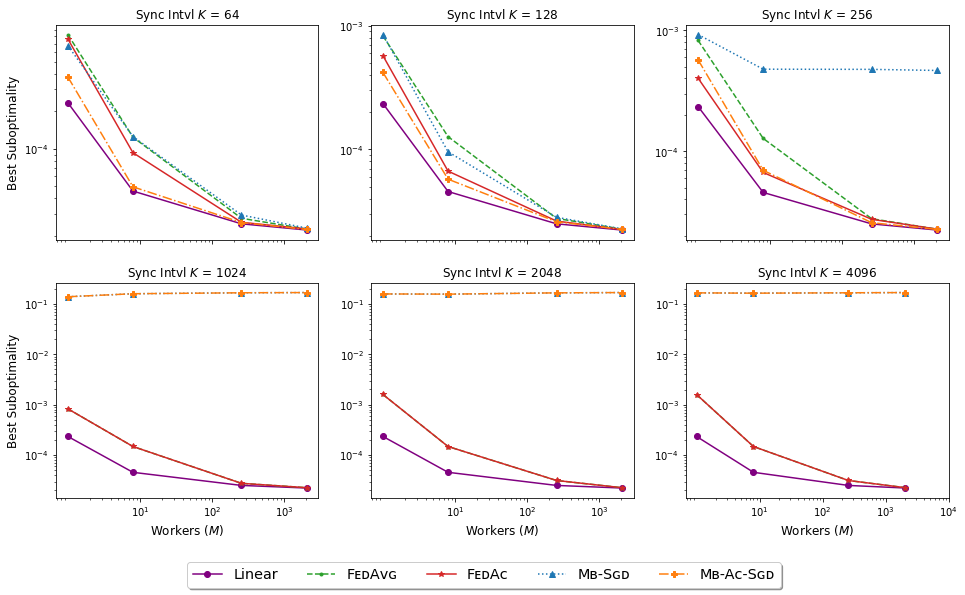

In [25]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(16, 9))

ylim = (5e-3,6e-3)

for axid, K in enumerate(K_sublst):
    ax_x = axid // 3
    ax_y = axid % 3
    ax = axes[ax_x, ax_y]
    
#     ax = axes[axid]

    for lineid, alg in enumerate(alg_lst):
        subopt_lst = []
        for M in M_sublst:
            subopt = min(df.loc[(df['M']==M) & \
                            (df['K']==K) & \
                            (df['alg']==alg)].best_loss)-optimum
            subopt_lst.append(subopt)
        ax.loglog(M_sublst, subopt_lst, color=color[alg], linestyle=style[alg], marker=marker[alg], label=name[alg])
    if ax_x==1: 
        ax.set_xlabel('Workers ($M$)', fontsize='large')
    ax.set_title(f'Sync Intvl $K$ = {K}', fontsize='large')
#     ax.set_ylim(ylim)
    ax.set_xticks([1e1, 1e2, 1e3, 1e4])

axes[0,0].set_ylabel(ylabel, fontsize='large')
axes[1,0].set_ylabel(ylabel, fontsize='large')
fig.subplots_adjust(bottom=0.15)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.42, 0), fancybox=True, ncol=len(alg_lst), shadow=True, fontsize='x-large')
fig.savefig(fig_path / f'{expr_mgr.get_name()}_M_6blocks.pdf', bbox_inches= 'tight')

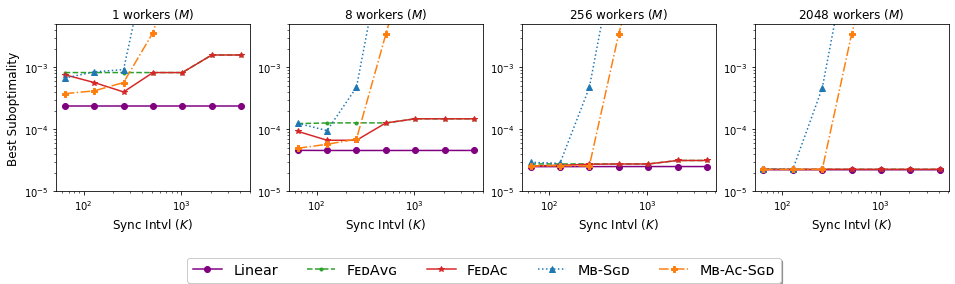

In [35]:
n_col = len(M_sublst)
fig, axes = plt.subplots(1, n_col, sharex=True, sharey=False, figsize=(16, 4))

K_sublst = [
    64, 128, 256,
    512, 
    1024, 2048,
    4096,
]
ylim = (1e-5,5e-3)

for axid, M in enumerate(M_sublst):
    ax = axes[axid]
    for lineid, alg in enumerate(alg_lst):
        subopt_lst = []
        for K in K_sublst:
            subopt = min(df.loc[(df['M']==M) & \
                            (df['K']==K) & \
                            (df['alg']==alg)].best_loss-optimum)
            subopt_lst.append(subopt)
        ax.loglog(K_sublst, subopt_lst, color=color[alg], marker=marker[alg], linestyle=style[alg],  label=name[alg])
    # ax.legend()
    ax.set_xlabel('Sync Intvl ($K$)', fontsize='large')
    ax.set_title(f'{M} workers ($M$)', fontsize='large')
    ax.set_ylim(ylim)

axes[0].set_ylabel(ylabel, fontsize='large')

fig.subplots_adjust(bottom=0.3)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.42, -0.022), fancybox=True, ncol=len(alg_lst), shadow=True, fontsize='x-large')
fig.savefig(fig_path / f'{expr_mgr.get_name()}_K_6blocks.pdf', bbox_inches= 'tight')